# Data Mining in Action 2016 (осенний семестр)

## Задача на семинар: цветовая сегментация кожи на изображении

В этом примере мы построим простой классификатор с использованием библиотеки scikit-learn. В качестве данных мы возьмем выборку из UCI Репозитория (www.archive.ics.uci.edu), связанную с задачей сегментации изображений, а точнее - выделением кожи на фотографиях. 

В итоге мы получим классификатор, который по RBG представлению цвета пикселя будет пытаться определить, принадлежит пиксель к участку кожи или нет.

<img src="skin_segmentation2.png" />

Для начала скачаем выборку по следующей ссылке: https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt

In [1]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt > Skin_NonSkin.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3321k  100 3321k    0     0  52717      0  0:01:04  0:01:04 --:--:-- 67178


## Чтение выборки

Давайте посмотрим на выборку и попробуем понять, какой смысл имеют

In [4]:
dataset_path = "Skin_NonSkin.txt"
dataset_file = open(dataset_path, 'r')
dataset_text = dataset_file.read().split('\n')


In [5]:
dataset = [map(int, line.split('\t')) for line in dataset_text if len(line) > 0]
print dataset[:10]

[[74, 85, 123, 1], [73, 84, 122, 1], [72, 83, 121, 1], [70, 81, 119, 1], [70, 81, 119, 1], [69, 80, 118, 1], [70, 81, 119, 1], [70, 81, 119, 1], [76, 87, 125, 1], [76, 87, 125, 1]]


In [6]:
X = [line[:-1] for line in dataset]
y = [line[-1] for line in dataset]

print X[:5]


[[74, 85, 123], [73, 84, 122], [72, 83, 121], [70, 81, 119], [70, 81, 119]]


In [7]:
for x in X:
    x.reverse()

In [8]:
import numpy as np

np.random.seed(0)
indices = np.random.permutation(len(X))
X = np.array(X)
y = np.array(y)
test_size = 100000
X_train = X[indices[:-test_size]]
y_train = y[indices[:-test_size]]
X_test  = X[indices[-test_size:]]
y_test  = y[indices[-test_size:]]


In [9]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [7]:
predicted = model.predict(X_test)
print predicted[:10]

[2 2 1 1 2 1 2 2 1 2]


In [8]:
print float(sum(y_test == predicted))/test_size
X_test

0.99949


array([[113, 158, 161],
       [206,  49,  78],
       [129,  74,  54],
       ..., 
       [138, 179, 183],
       [212, 145, 102],
       [168, 135, 128]])

## Чтение и обработка изображения

Для работы с графиками и изображениями в Python есть библиотека Matplotlib. На сайте библиотеки www.matplotlib.org описан API и есть большое количество примеров в разделе gallery. При необходимости построить график можно зайти в галерею, найти визуально картинку, наиболее похожую на нужную и посмотреть код.

Но сейчас мы воспользуемся matplotlib для работы с изображением, на котором хотим найти участки кожи. Для начала считаем изображение:

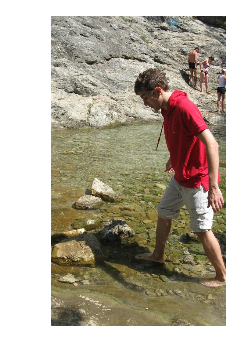

In [52]:
%matplotlib inline 
# чтобы изображения выводились прямо в ipython notebook, а не в отдельном окне


import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

image_path = "kantor.jpg"

image_file = open(image_path, 'rb')
#image_file = cbook.get_sample_data(image_path)
image = plt.imread(image_file)

plt.imshow(image)
plt.axis('off') # clear x- and y-axes
plt.show()

Посмотрим, в каком формате хранится изображение в переменой image:

In [53]:
print type(image)

<type 'numpy.ndarray'>


Поскольку это массив, попробуем вывести несколько его первых элементов:

In [10]:
print image[:3]

[[[133 119 116]
  [123 109 106]
  [147 133 130]
  ..., 
  [129 131 120]
  [126 130 116]
  [121 125 111]]

 [[176 165 161]
  [146 135 131]
  [165 154 150]
  ..., 
  [125 128 117]
  [145 148 137]
  [128 131 120]]

 [[168 160 157]
  [150 142 139]
  [150 142 139]
  ..., 
  [ 67  73  61]
  [ 76  82  70]
  [ 61  67  55]]]


Похоже на массив строк пикселей. Каждая строка - массив пикселей, а пиксель - массив из трех чисел - RGB представления цвета пикселя.

Обучим наш классификатор на всей обучающей выборке и прогоним классификатор по всем пикселям изображения, заменяя пиксели кожи на ярко зелёные:

In [54]:
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [55]:
for i, line in enumerate(image):
    classes = model.predict(line) # predict принимает список объектов
    for j, ans in enumerate(classes):
        if ans == 1:
            image[i, j, 0] = image[i, j, 2] = 0
            image[i, j, 1] = 255

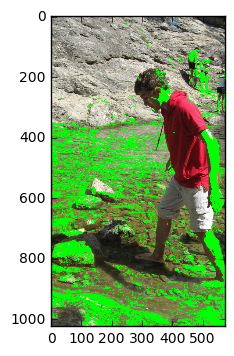

In [59]:
plt.imshow(image)
plt.show()


In [60]:
import scipy.misc
scipy.misc.imsave('outfile.jpg', image)

Не правда ли, какой-то подозрительный результат?

## Задание

#### На семинаре:

1. Выяснить, почему на изображении не выделились участки кожи и исправить ситуацию. Подсказка: читайте документацию библиотек либо пробуйте визуализировать цвета, которые классификатор относит к коже. Блокнот с решением проблемы выложить на github.
1. Сравнить качество на отложенной выборке при разном количестве соседей k в kNN (от 1 до 10) и при разных весах во взвешенной версии kNN (см. документацию scikit-learn). 
1. Блокнот с исправлением детектирования кожи и экспериментами выслать на datamininginaction@gmail.com

#### Дополнительные задания (к следующему занятию):

1. С помощью matplotlib построить трёхмерную визуализацию выборки и выслать на тот же адрес.
1. Разобрать презенташку про numpy, scipy, matplotlib: http://mit.spbau.ru/files/scipy.pdf
1. Разобрать Crash Course in Python for scientists.

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score

result_uniform = []
result_distance = []

for n_neighbors in xrange(1,11):
    uniform_score = cross_val_score(KNeighborsClassifier(n_neighbors=n_neighbors), X, y)
    distance_score = cross_val_score( KNeighborsClassifier(n_neighbors=n_neighbors,weights='distance'), X, y)
    result_uniform.append(uniform_score)
    result_distance.append(distance_score)
    
    

In [25]:
result_uniform = np.array(result_uniform)
result_uniform

array([[ 0.94615968,  0.98477095,  0.99167534],
       [ 0.95728766,  0.9867664 ,  0.9888474 ],
       [ 0.95460666,  0.9863012 ,  0.98920242],
       [ 0.96218446,  0.98754989,  0.98724368],
       [ 0.95557378,  0.98708469,  0.98769664],
       [ 0.96223343,  0.98784369,  0.9866683 ],
       [ 0.96005435,  0.98770903,  0.98808839],
       [ 0.9628945 ,  0.98825992,  0.98459938],
       [ 0.95710403,  0.98811302,  0.98506458],
       [ 0.95976055,  0.98854149,  0.98461162]])

In [27]:
result_uniform.mean(axis=1)

array([ 0.97420199,  0.97763382,  0.97670343,  0.97899268,  0.97678504,
        0.97891514,  0.97861726,  0.9785846 ,  0.97676054,  0.97763788])

In [28]:
result_distance = np.array(result_distance)
result_distance

array([[ 0.94615968,  0.98477095,  0.99167534],
       [ 0.94622089,  0.98429351,  0.99168758],
       [ 0.95449649,  0.98648483,  0.98908   ],
       [ 0.95242759,  0.98619102,  0.98960641],
       [ 0.95490047,  0.98715814,  0.98758646],
       [ 0.95501065,  0.98719487,  0.98797821],
       [ 0.95874446,  0.98766006,  0.98801494],
       [ 0.95696937,  0.9875254 ,  0.98717023],
       [ 0.95632054,  0.9879049 ,  0.98511355],
       [ 0.95703058,  0.98795387,  0.98479525]])

In [29]:
result_distance.mean(axis=1)

array([ 0.97420199,  0.97406733,  0.97668711,  0.97607501,  0.97654836,
        0.97672791,  0.97813982,  0.97722167,  0.97644633,  0.97659323])

Результаты примерно одинаковые

# Дополнительное задание

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

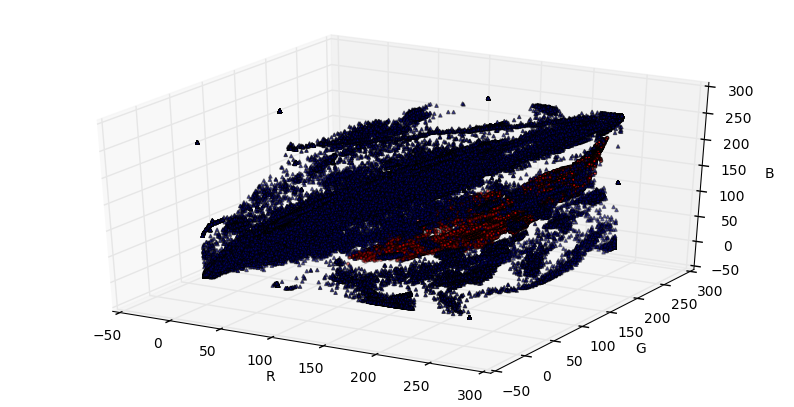

In [60]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y == 1][:,0], X[y == 1][:,1], X[y == 1][:,2], c='r', marker='o',s=5)
ax.scatter(X[y == 2][:,0], X[y == 2][:,1], X[y == 2][:,2], c='b', marker='^',s=5)

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

plt.show()

Точек слишком много,возьмем по 3000 точек каждого класса

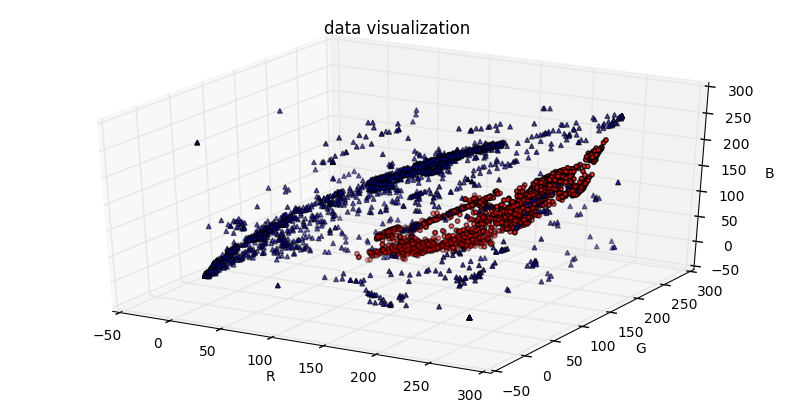

In [59]:
n = 3000
label_1 = np.random.choice(sum(y == 1), n)
label_2 = np.random.choice(sum(y == 2), n)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y == 1][label_1][:,0], X[y == 1][label_1][:,1], X[y == 1][label_1][:,2], c='r', marker='o',s = 10)
ax.scatter(X[y == 2][label_2][:,0], X[y == 2][label_2][:,1], X[y == 2][label_2][:,2], c='b', marker='^',s =10)

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_title('data visualization')

plt.show()